In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.legend_handler import HandlerLine2D
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from time import time
from sklearn.model_selection import cross_val_score

In [2]:

df = pd.read_csv("sgemm_product.csv")
#df.head()
df["RunF"]= (df["Run1 (ms)"] + df["Run2 (ms)"]+ df["Run3 (ms)"]+df["Run4 (ms)"])/4
df=df.drop(columns=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'])
df['RunF'].mean()
df['RunF_binary'] = np.where(df['RunF']>=217.5, 1, 0)
train,test = train_test_split(df,test_size = 0.3, random_state=5000)
x_train= train.iloc[:,0:14]
y_train= train.iloc[:,-1]
x_test= test.iloc[:,0:14]
y_test= test.iloc[:,-1]


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(x_train, y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
#accuracy_score(y_train,y_pred_train)
accuracy_score(y_test,y_pred_test)
confusion_matrix( y_pred_train,y_train)
confusion_matrix( y_pred_test,y_test)


In [3]:
def dtmetrics (x_tr,x_ts,y_tr,y_ts,max_depth):
    train_results = []
    test_results = []
    train_accuracy = []
    test_accuracy = []
    for max_depth in max_depths:
       dt = DecisionTreeClassifier(max_depth=max_depth)
       dt.fit(x_tr, y_tr)
       train_pred = dt.predict(x_tr)
       test_pred = dt.predict(x_ts) 
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       # Add auc score to previous train results
       train_results.append(roc_auc)
       y_pred = dt.predict(x_ts)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_ts, y_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       # Add auc score to previous test results
       test_results.append(roc_auc)
       train_acc= accuracy_score(y_tr,train_pred)
       test_acc=accuracy_score(y_ts,test_pred)
       train_accuracy.append(train_acc)
       test_accuracy.append(test_acc)
    return test_accuracy, train_accuracy,test_results,train_results



In [22]:
max_depths =np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
test_accuracy,train_accuracy,test_AUC,train_AUC=dtmetrics (x_tr=x_train,x_ts=x_test,y_tr=y_train,y_ts=y_test,max_depth=max_depths)

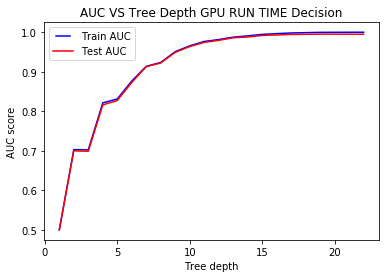

In [23]:
line1, = plt.plot(max_depths, train_AUC, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_AUC, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.title("AUC VS Tree Depth GPU RUN TIME Decision")
plt.show()

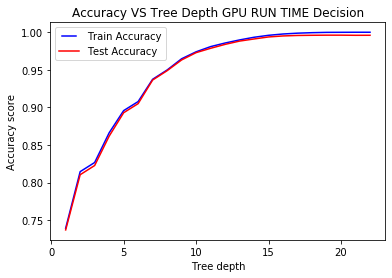

In [24]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("Tree depth")
plt.title("Accuracy VS Tree Depth GPU RUN TIME Decision")
plt.show()

In [5]:
df2 = pd.read_csv("voice.csv")
np.sum(df2['label'] == 'male')
df2['label'] = np.where(df2['label']=='male', 1, 0)
df2['label'] 
#df2=df2.drop(df2.query('label == 1').sample(frac=.5).index)
np.sum(df2['label'] == 1)
train2,test2 = train_test_split(df2,test_size = 0.4, random_state=100)
x_train2= train2.iloc[:,0:20]
y_train2= train2.iloc[:,-1]
x_test2= test2.iloc[:,0:20]
y_test2= test2.iloc[:,-1]

In [10]:
max_depths =np.array([1,2,3,4,5,6,7,8,9,10])
test_accuracy2,train_accuracy2,test_AUC2,train_AUC2=dtmetrics (x_tr=x_train2,x_ts=x_test2,y_tr=y_train2,y_ts=y_test2,max_depth=max_depths)

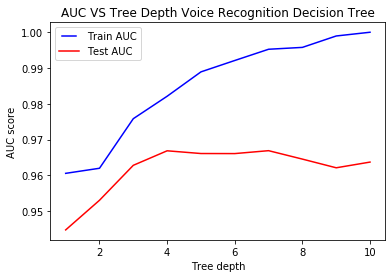

In [11]:
line1, = plt.plot(max_depths, train_AUC2, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_AUC2, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.title("AUC VS Tree Depth Voice Recognition Decision Tree")
plt.show()

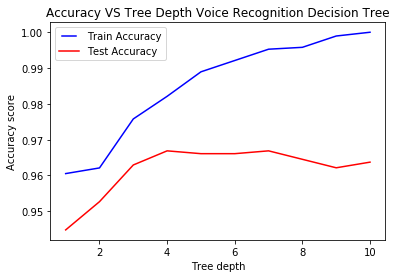

In [13]:
line1, = plt.plot(max_depths, train_accuracy2, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_accuracy2, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("Tree depth")
plt.title("Accuracy VS Tree Depth Voice Recognition Decision Tree")
plt.show()

In [6]:
def svwork (x_tr,y_tr, x_ts, y_ts,kernel,c):
    train_results = []
    test_results = []
    train_accuracies = []
    test_accuracies = []
    for c in c:
       svc=SVC(kernel=kernel, C=c, gamma='auto')
       svc.fit(x_tr,y_tr)
       train_pred = svc.predict(x_tr)
       test_pred = svc.predict(x_ts) 
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       # Add auc score to previous train results
       train_results.append(roc_auc)
       y_pred = svc.predict(x_ts)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_ts, y_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       # Add auc score to previous test results
       test_results.append(roc_auc)
       train_acc= accuracy_score(y_tr,train_pred)
       test_acc=accuracy_score(y_ts,test_pred)
       train_accuracies.append(train_acc)
       test_accuracies.append(test_acc)
    return test_accuracies, train_accuracies,test_results,train_results


In [17]:

#Voice recognition linear kernel
c= np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000])
kernel='linear'
test_acc_lr2, train_acc_lr2,test_res_lr2,train_res_lr2=svwork(x_tr=x_train2,y_tr=y_train2, x_ts=x_test2, y_ts=y_test2,kernel= kernel,c=c)


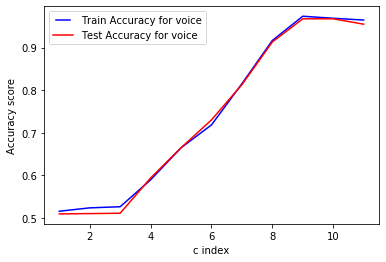

In [18]:
#plotting without the scale
c_s= np.array([1,2,3,4,5,6,7,8,9,10,11])
#Voice recognition linear test vs traian
line1, = plt.plot(c_s, train_acc_lr2, 'b', label="Train Accuracy for voice")
line2, = plt.plot(c_s, test_acc_lr2, 'r', label="Test Accuracy for voice")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index")
plt.show()

In [18]:
#voice recognition linear kernel cross validated

c_cv= np.array([1,10,100,1000])
acc_score2_lr=[]
for c in c_cv:
    svc = SVC(kernel='linear', C=c, gamma='auto')
    scores = cross_val_score(svc, df2.iloc[:,0:20], df2.iloc[:,-1], cv=5, scoring='accuracy')
    acc_score2_lr.append(scores.mean())
print(acc_score2_lr)    
    


[0.9172992452980873, 0.9649672563191312, 0.9564409216148226, 0.9504372479335542]


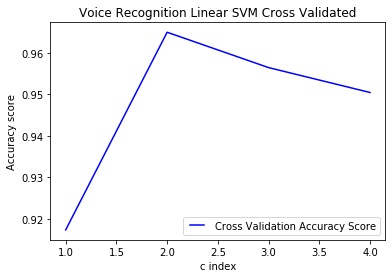

In [19]:
#plotting without the scale. Narrowing down to 1,10,100,1000

c_i= np.array([1,2,3,4])
#Voice recognition linear test vs train
line1, = plt.plot(c_i, acc_score2_lr, 'b', label="Cross Validation Accuracy Score")
#line2, = plt.plot(c_i, test_acc_lr2, 'r', label="Test Accuracy for voice")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index")
plt.title("Voice Recognition Linear SVM Cross Validated")
plt.show()

In [7]:
#takes x 0 and 19 seconds
#Voice recognition Sigmoid kernel
c= np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000])
kernel='sigmoid'
test_acc_s2, train_acc_s2,test_res_s2,train_res_s2=svwork(x_tr=x_train2,y_tr=y_train2, x_ts=x_test2, y_ts=y_test2,kernel= kernel,c=c)


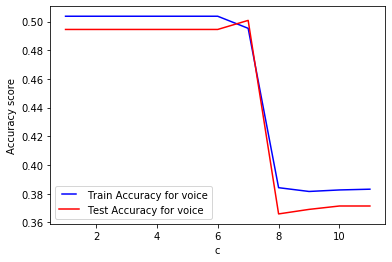

In [8]:
#plotting sigmoid without the scale of c 
c_s= np.array([1,2,3,4,5,6,7,8,9,10,11])
line1, = plt.plot(c_s, train_acc_s2, 'b', label="Train Accuracy for voice")
line2, = plt.plot(c_s, test_acc_s2, 'r', label="Test Accuracy for voice")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c")
plt.show()

In [14]:
#from time import time 8.393 s seconds
#new values of c to improve accuracy
#Voice recognition Sigmoid kernel
t0 = time()
c_new= np.array([10**-30, 10**-25,10**-20,10**-15,10**-10])
kernel='sigmoid'
test_acc_s2_n, train_acc_s2_n,test_res_s2_n,train_res_s2_n=svwork(x_tr=x_train2,y_tr=y_train2, x_ts=x_test2, y_ts=y_test2,kernel= kernel,c=c_new)
print ("Training time:", round(time() - t0, 3), "s")

Training time: 8.38 s


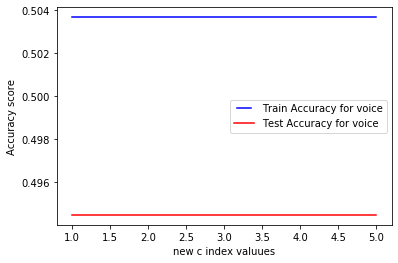

In [15]:
#plotting sigmoid without the scale of new c values 
c_s_n= np.array([1,2,3,4,5])
line1, = plt.plot(c_s_n, train_acc_s2_n, 'b', label="Train Accuracy for voice")
line2, = plt.plot(c_s_n, test_acc_s2_n, 'r', label="Test Accuracy for voice")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("new c index valuues")
plt.show()

In [16]:
#Results not meaningful. We choose to not plot or report these. Sigmoid is not the best kernel for the voice recognition data  
#voice crossvalidating sigmoid
c_cv= np.array([0.01,0.1,1,10,100])
acc_score=[]
for c in c_cv:
    svc = SVC(kernel='sigmoid', C=c, gamma= 'auto')
    scores = cross_val_score(svc, x_train2, y_train2, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score )    

[0.5036842542656815, 0.49790583206124683, 0.40015629533403024, 0.40700690061395484, 0.40700690061395484] [0.4944794952681388, 0.4944794952681388, 0.4944794952681388, 0.4944794952681388, 0.4944794952681388]


In [26]:
#Voice recognition RBF kernel
t0=time()
c= np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000])
kernel='rbf'
test_acc_r2, train_acc_r2,test_res_r2,train_res_r2=svwork(x_tr=x_train2,y_tr=y_train2, x_ts=x_test2, y_ts=y_test2,kernel= kernel,c=c)
print('train accuracy is', max(train_acc_r2), 'and test accuracy is', max(test_acc_r2) )
print ("Training time:", round(time() - t0, 3), "s")

train accuracy is 0.9921052631578947 and test accuracy is 0.9077287066246057
Training time: 15.217 s


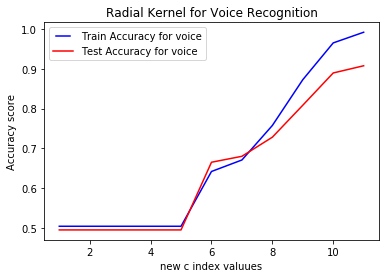

In [30]:
#plotting rbf without the scale of new c values 
c_r= np.array([1,2,3,4,5,6,7,8,9,10,11])
line1, = plt.plot(c_r, train_acc_r2, 'b', label="Train Accuracy for voice")
line2, = plt.plot(c_r, test_acc_r2, 'r', label="Test Accuracy for voice")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("new c index valuues")
plt.title("Radial Kernel for Voice Recognition")
plt.show()

In [23]:
#Voice data RBF kernel crossvalidation
c_cv= np.array([1,10,100,1000])
acc_score2_r=[]
for c in c_cv:
    svc = SVC(kernel='linear', C=c, gamma='auto')
    scores = cross_val_score(svc, df2.iloc[:,0:20], df2.iloc[:,-1], cv=5, scoring='accuracy')
    acc_score2_r.append(scores.mean())
print(acc_score2_r)    
    

[0.9172992452980873, 0.9649672563191312, 0.9564409216148226, 0.9504372479335542]


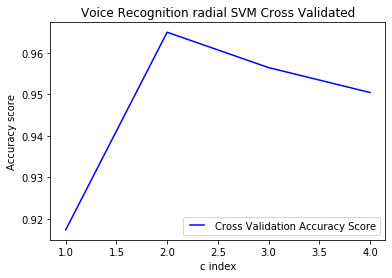

In [24]:
#narrowing the c values for cv 
c_i= np.array([1,2,3,4])
#Voice recognition linear test vs train
line1, = plt.plot(c_i, acc_score2_r, 'b', label="Cross Validation Accuracy Score")
#line2, = plt.plot(c_i, test_acc_lr2, 'r', label="Test Accuracy for voice")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index")
plt.title("Voice Recognition radial SVM Cross Validated")
plt.show()

In [7]:
#scaling training and testing to optimize computing time for the bigger data set of GPU Assignment 1
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()
print(x_train['KWG'].max() ,"and", x_test['KWG'].max())
dfk=df.sample(n = 50000, random_state = 100) 

traink,testk = train_test_split(dfk,test_size = 0.3, random_state=5000)
x_traink= traink.iloc[:,0:14]
y_traink= traink.iloc[:,-1]
x_testk= testk.iloc[:,0:14]
y_testk= testk.iloc[:,-1]



0.8257389952395663 and 0.8258167625813843


In [36]:
#GPU Runtime  linear kernel
t0= time()
c1= np.array([10**-30, 10**-20,10**-10,10**-1,10**0])
kernel='linear'
test_acc_lr, train_acc_lr,test_res_lr,train_res_lr=svwork(x_tr=x_train,y_tr=y_train, x_ts=x_test, y_ts=y_test,kernel= kernel,c=c1)
print('for entire dataset train accuracy is', max(train_acc_lr), 'and test accuracy is', max(test_acc_lr) )
print ("Training time:", round(time() - t0, 3), "s")

for entire dataset train accuracy is 0.9332131031220435 and test accuracy is 0.9317466887417218
Training time: 7954.516 s


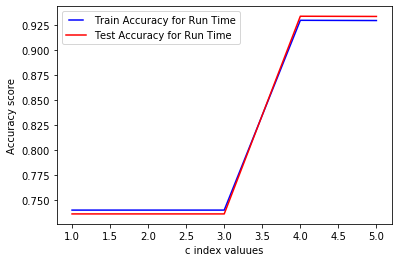

In [28]:
#for entire dataset train accuracy is 0.9332131031220435 and test accuracy is 0.9317466887417218
#Training time: 7954.516 s
#for n=50000 train accuracy is 0.9297428571428571 and test accuracy is 0.9338
#Training time: 793.122 s
#for n=5000 train accuracy is 0.9382857142857143 and test accuracy is 0.9366666666666666 and 93 seconds
#plotting linear kernel for GPU data without the scale of new c values 
c_s_n= np.array([1,2,3,4,5])
line1, = plt.plot(c_s_n, train_acc_lr, 'b', label="Train Accuracy for Run Time")
line2, = plt.plot(c_s_n, test_acc_lr, 'r', label="Test Accuracy for Run Time")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index valuues")
plt.show()

In [21]:
#we use a sample of data instead of all gpu data
#GPU data linear kernel crossvalidation
t0=time()
c_cv= np.array([0.01,0.03,0.05,0.07])
acc_score_lr=[]
for c in c_cv:
    svc = SVC(kernel='linear', C=c, gamma='auto')
    scores = cross_val_score(svc, x_traink,y_traink, cv=5, scoring='accuracy')
    acc_score_lr.append(scores.mean())
print(acc_score_lr)    
print ("Training time:", round(time() - t0, 3), "s")    

[0.9288857142857143, 0.928657142857143]
Training time: 436.582 s


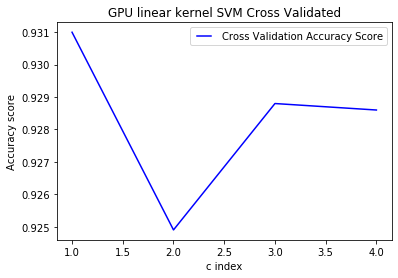

In [9]:
p=np.array([0.931,0.9249,0.9288,0.9286])

c_i= np.array([1,2,3,4])
#gpu linear test vs train
line1, = plt.plot(c_i, p, 'b', label="Cross Validation Accuracy Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index")
plt.title("GPU linear kernel SVM Cross Validated")
plt.show()

In [14]:
##################################
#GPU Sigmoid kernel
t0=time()
c= np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000])
kernel='sigmoid'
test_acc_s, train_acc_s,test_res_s,train_res_s=svwork(x_tr=x_train,y_tr=y_train, x_ts=x_test, y_ts=y_test,kernel= kernel,c=c)
print ("Training time:", round(time() - t0, 3), "s")

Training time: 40827.762 s


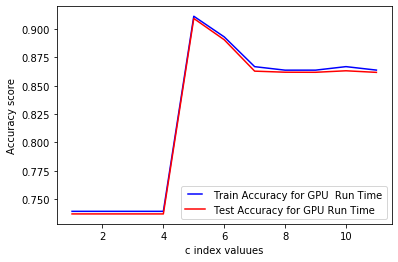

In [16]:
#GPU Sigmoid # between 4th and 5th value
c_s_n= np.array([1,2,3,4,5,6,7,8,9,10,11])
line1, = plt.plot(c_s_n, train_acc_s, 'b', label="Train Accuracy for GPU  Run Time")
line2, = plt.plot(c_s_n, test_acc_s, 'r', label="Test Accuracy for GPU Run Time")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index valuues")
plt.show()

In [10]:
#youre here
#we use a sample of data instead of all gpu data
#GPU data sigmoid kernel crossvalidation
t0=time()
c_cv= np.array([10])
acc_score_s=[]
for c in c_cv:
    svc = SVC(kernel='sigmoid', C=c, gamma='auto')
    scores = cross_val_score(svc, x_traink,y_traink, cv=5, scoring='accuracy')
    acc_score_s.append(scores.mean())
print(acc_score_s)    
print ("Training time:", round(time() - t0, 3), "s")    
    

[0.7401428571428571]
Training time: 193.874 s


In [8]:
#GPU Runtime  rbf kernel
t0= time()
c1= np.array([10**-2,10**-1,10**0,10**1])
kernel='rbf'
test_acc_r, train_acc_r,test_res_r,train_res_r=svwork(x_tr=x_train,y_tr=y_train, x_ts=x_test, y_ts=y_test,kernel= kernel,c=c1)
print('for entire dataset train accuracy is', max(train_acc_r), 'and test accuracy is', max(test_acc_r) )
print ("Training time:", round(time() - t0, 3), "s")

for entire dataset train accuracy is 0.9869264427625355 and test accuracy is 0.9831953642384106
Training time: 6676.907 s


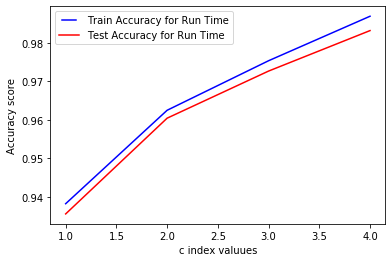

for entire dataset train accuracy is 0.9869264427625355 and test accuracy is 0.9831953642384106
Training time: 1.087 s


In [9]:
#GPU RBF 
t0= time()
c_s_n= np.array([1,2,3,4])
line1, = plt.plot(c_s_n, train_acc_r, 'b', label="Train Accuracy for Run Time")
line2, = plt.plot(c_s_n, test_acc_r, 'r', label="Test Accuracy for Run Time")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index valuues")
plt.show()
print('for entire dataset train accuracy is', max(train_acc_r), 'and test accuracy is', max(test_acc_r) )
print ("Training time:", round(time() - t0, 3), "s")

In [12]:
test_acc_r

[0.9355132450331126,
 0.9604166666666667,
 0.9726683222958057,
 0.9831953642384106]

In [ ]:
#GPU data rbf kernel crossvalidation
t0=time()
c_cv= np.array([10**-1,10**0,10**1])
acc_score_r=[]
for c in c_cv:
    svc = SVC(kernel='rbf', C=c, gamma='auto')
    scores = cross_val_score(svc, x_traink,y_traink, cv=5, scoring='accuracy')
    acc_score_r.append(scores.mean())
print(acc_score_r)    
print ("Training time:", round(time() - t0, 3), "s")    


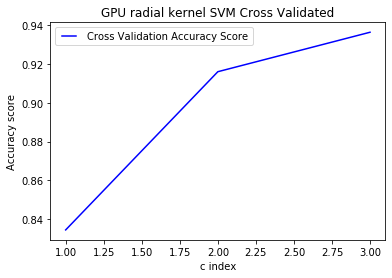

In [16]:

#[0.8343714285714284, 0.9160571428571428, 0.9364285714285716]])
c_i= np.array([1,2,3])
#gpu radial kernel SVM Cross Validate
line1, = plt.plot(c_i, acc_score_r, 'b', label="Cross Validation Accuracy Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("c index")
plt.title("GPU radial kernel SVM Cross Validated")
plt.show()